In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk87 import rk_error_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [3]:
def tol_experiment(tol, model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-5
    (   res, 
        crk8_continous_sol,
        crk7_continous_sol,
        hb8_continous_sol,
        hb10_continous_sol) = rk_error_control(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk7_computed_solutions = [crk7_continous_sol.eval(x) for x in t_eval]
    crk8_computed_solutions = [crk8_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    hb10_computed_solutions = [hb10_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    # plt.figure()
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    # plt.plot(t_eval, crk7_computed_solutions, label="crk7")
    # plt.plot(t_eval, crk8_computed_solutions, label="crk8")
    # plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    # plt.plot(t_eval, hb10_computed_solutions, label="hb10")
    # plt.plot(t_eval, actual_solutions, label="solution")
    # plt.title("solution vs interpolants")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk7_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk7_computed_solutions, actual_solutions)]
    crk8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk8_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    hb10_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb10_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk7_error, label="crk7 error")
    plt.plot(t_eval, crk8_error, label="crk8 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.plot(t_eval, hb10_error, label="hb10 error")
    # plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # plot_shape_of_errors(crk7_continous_sol, solution, "crk7")
    # plot_shape_of_errors(crk8_continous_sol, solution, "crk8")
    # plot_shape_of_errors(hb8_continous_sol , solution, "hb8")
    # plot_shape_of_errors(hb10_continous_sol , solution, "hb10")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

def experiment(model, y0, tspan, solution):
    for tol in [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12]:
        tol_experiment(tol, model, y0, tspan, solution)

nsteps = 7
nsuccessful_steps = 7
integration complete


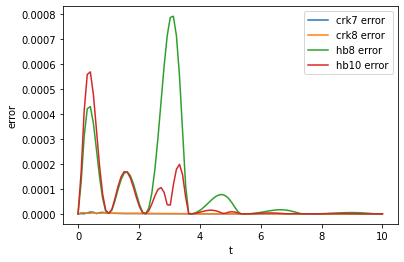

0.0
2.7554610722013706e-06
1.3814982622317729e-06
7.922862369502681e-07
4.929258836661177e-07
3.229937290405438e-07
2.1924391152561284e-07
1.5261559410673087e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


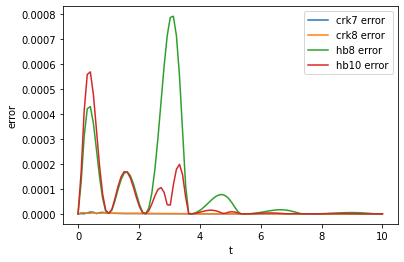

0.0
2.7554610722013706e-06
1.3814982622317729e-06
7.922862369502681e-07
4.929258836661177e-07
3.229937290405438e-07
2.1924391152561284e-07
1.5261559410673087e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


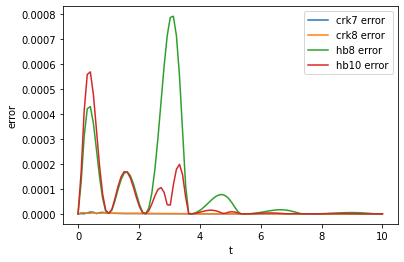

0.0
2.7554610722013706e-06
1.3814982622317729e-06
7.922862369502681e-07
4.929258836661177e-07
3.229937290405438e-07
2.1924391152561284e-07
1.5261559410673087e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


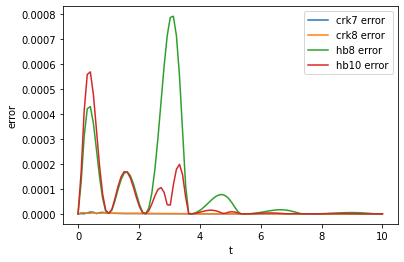

0.0
2.7554610722013706e-06
1.3814982622317729e-06
7.922862369502681e-07
4.929258836661177e-07
3.229937290405438e-07
2.1924391152561284e-07
1.5261559410673087e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


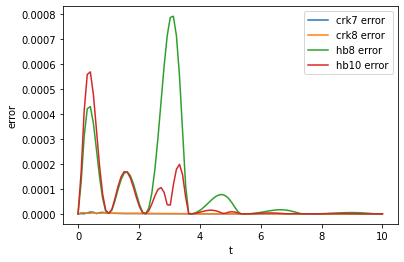

0.0
2.7554610722013706e-06
1.3814982622317729e-06
7.922862369502681e-07
4.929258836661177e-07
3.229937290405438e-07
2.1924391152561284e-07
1.5261559410673087e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


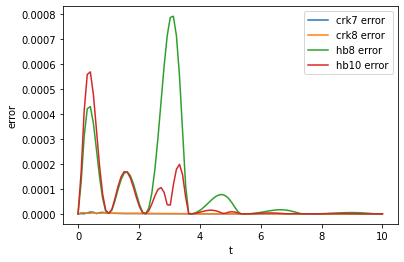

0.0
2.7554610722013706e-06
1.3814982622317729e-06
7.922862369502681e-07
4.929258836661177e-07
3.229937290405438e-07
2.1924391152561284e-07
1.5261559410673087e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 12
nsuccessful_steps = 9
integration complete


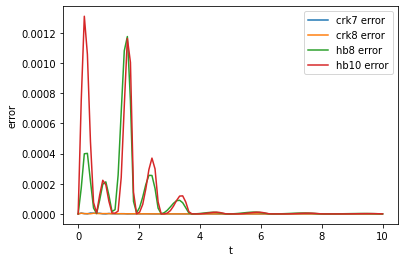

0.0
3.317703382132997e-06
1.2000510786758234e-06
8.18766193955156e-07
3.2869151679604247e-07
1.1564924211338035e-07
4.145408841887965e-08
1.5562863855261844e-08
6.112976732447484e-09
2.4954638216945213e-09
nsteps = 12
nsuccessful_steps = 9
integration complete


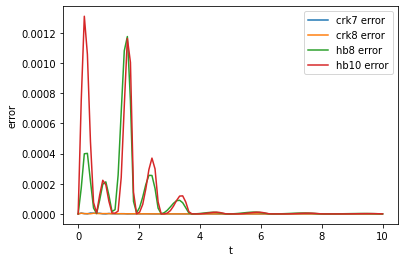

0.0
3.317703382132997e-06
1.2000510786758234e-06
8.18766193955156e-07
3.2869151679604247e-07
1.1564924211338035e-07
4.145408841887965e-08
1.5562863855261844e-08
6.112976732447484e-09
2.4954638216945213e-09
nsteps = 12
nsuccessful_steps = 9
integration complete


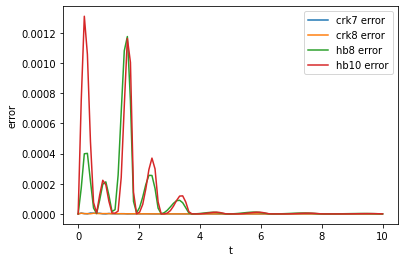

0.0
3.317703382132997e-06
1.2000510786758234e-06
8.18766193955156e-07
3.2869151679604247e-07
1.1564924211338035e-07
4.145408841887965e-08
1.5562863855261844e-08
6.112976732447484e-09
2.4954638216945213e-09
nsteps = 12
nsuccessful_steps = 9
integration complete


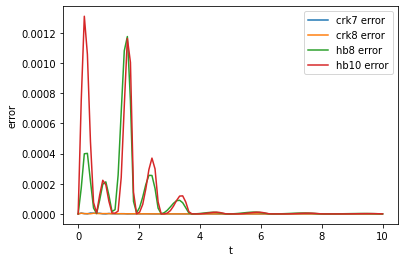

0.0
3.317703382132997e-06
1.2000510786758234e-06
8.18766193955156e-07
3.2869151679604247e-07
1.1564924211338035e-07
4.145408841887965e-08
1.5562863855261844e-08
6.112976732447484e-09
2.4954638216945213e-09
nsteps = 12
nsuccessful_steps = 9
integration complete


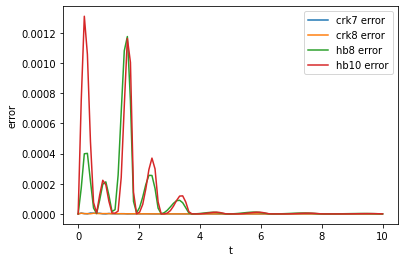

0.0
3.317703382132997e-06
1.2000510786758234e-06
8.18766193955156e-07
3.2869151679604247e-07
1.1564924211338035e-07
4.145408841887965e-08
1.5562863855261844e-08
6.112976732447484e-09
2.4954638216945213e-09
nsteps = 12
nsuccessful_steps = 9
integration complete


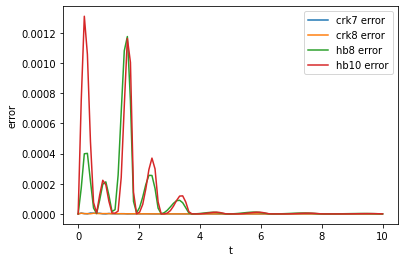

0.0
3.317703382132997e-06
1.2000510786758234e-06
8.18766193955156e-07
3.2869151679604247e-07
1.1564924211338035e-07
4.145408841887965e-08
1.5562863855261844e-08
6.112976732447484e-09
2.4954638216945213e-09


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 7
nsuccessful_steps = 7
integration complete


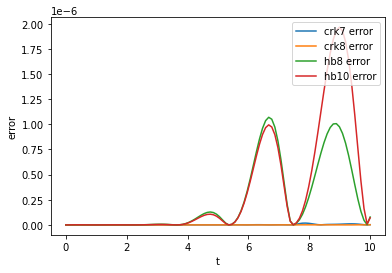

0.0
4.6851411639181606e-14
1.376676550535194e-13
4.658495811327157e-13
5.861977570020827e-14
2.7467805807646073e-11
4.7341686126856075e-11
9.803894585047601e-09
nsteps = 7
nsuccessful_steps = 7
integration complete


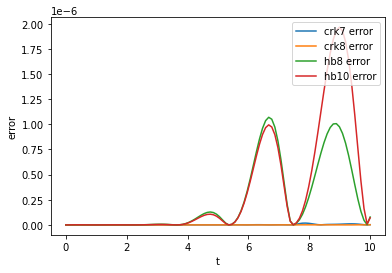

0.0
4.6851411639181606e-14
1.376676550535194e-13
4.658495811327157e-13
5.861977570020827e-14
2.7467805807646073e-11
4.7341686126856075e-11
9.803894585047601e-09
nsteps = 7
nsuccessful_steps = 7
integration complete


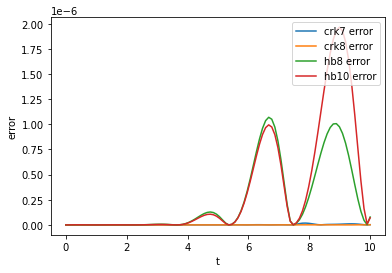

0.0
4.6851411639181606e-14
1.376676550535194e-13
4.658495811327157e-13
5.861977570020827e-14
2.7467805807646073e-11
4.7341686126856075e-11
9.803894585047601e-09
nsteps = 7
nsuccessful_steps = 7
integration complete


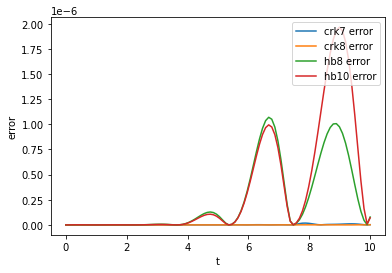

0.0
4.6851411639181606e-14
1.376676550535194e-13
4.658495811327157e-13
5.861977570020827e-14
2.7467805807646073e-11
4.7341686126856075e-11
9.803894585047601e-09
nsteps = 7
nsuccessful_steps = 7
integration complete


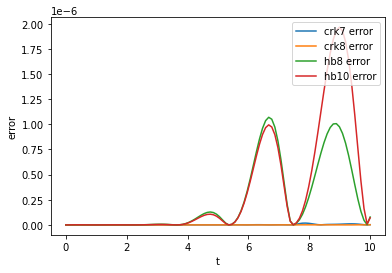

0.0
4.6851411639181606e-14
1.376676550535194e-13
4.658495811327157e-13
5.861977570020827e-14
2.7467805807646073e-11
4.7341686126856075e-11
9.803894585047601e-09
nsteps = 7
nsuccessful_steps = 7
integration complete


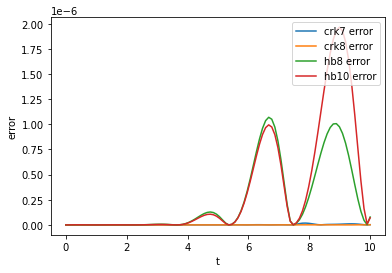

0.0
4.6851411639181606e-14
1.376676550535194e-13
4.658495811327157e-13
5.861977570020827e-14
2.7467805807646073e-11
4.7341686126856075e-11
9.803894585047601e-09


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 233
nsuccessful_steps = 208
integration complete


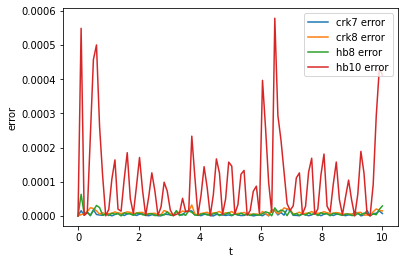

0.0
0.000613236488863543
2.430154372468074e-05
7.149829080760339e-06
9.206405720829647e-06
4.828537650936049e-06
9.184171216258807e-06
9.816577256127612e-06
1.1982191059856095e-05
1.3452762035515153e-05
1.5162872220697565e-05
1.6710789532581316e-05
1.825962716239804e-05
1.9734017946415605e-05
3.379588013663337e-06
4.4454593972620415e-06
4.625847087158519e-06
4.840917345316775e-06
5.0439376954036774e-06
5.236824016430219e-06
5.41906744422338e-06
5.59030362590196e-06
5.750184430275418e-06
5.898385201708045e-06
6.03460484660534e-06
6.1585666788488425e-06
6.2700189159548e-06
6.36873515391656e-06
6.45451485437043e-06
6.527183794902136e-06
6.586594422763881e-06
6.632625963010064e-06
6.6651849611742975e-06
6.684205282270206e-06
6.689648300972628e-06
6.681502946248585e-06
6.659785752538561e-06
6.624540866195794e-06
6.5758398669624185e-06
6.5137816359639444e-06
6.438492278881824e-06
6.350124718057515e-06
6.248858430812909e-06
6.134899113385828e-06
6.008478326213762e-06
5.869852740647552e-06
5.7

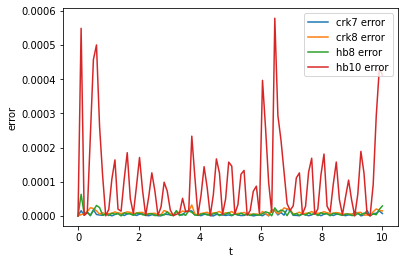

0.0
0.000613236488863543
2.430154372468074e-05
7.149829080760339e-06
9.206405720829647e-06
4.828537650936049e-06
9.184171216258807e-06
9.816577256127612e-06
1.1982191059856095e-05
1.3452762035515153e-05
1.5162872220697565e-05
1.6710789532581316e-05
1.825962716239804e-05
1.9734017946415605e-05
3.379588013663337e-06
4.4454593972620415e-06
4.625847087158519e-06
4.840917345316775e-06
5.0439376954036774e-06
5.236824016430219e-06
5.41906744422338e-06
5.59030362590196e-06
5.750184430275418e-06
5.898385201708045e-06
6.03460484660534e-06
6.1585666788488425e-06
6.2700189159548e-06
6.36873515391656e-06
6.45451485437043e-06
6.527183794902136e-06
6.586594422763881e-06
6.632625963010064e-06
6.6651849611742975e-06
6.684205282270206e-06
6.689648300972628e-06
6.681502946248585e-06
6.659785752538561e-06
6.624540866195794e-06
6.5758398669624185e-06
6.5137816359639444e-06
6.438492278881824e-06
6.350124718057515e-06
6.248858430812909e-06
6.134899113385828e-06
6.008478326213762e-06
5.869852740647552e-06
5.7

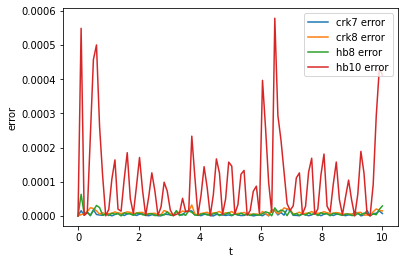

0.0
0.000613236488863543
2.430154372468074e-05
7.149829080760339e-06
9.206405720829647e-06
4.828537650936049e-06
9.184171216258807e-06
9.816577256127612e-06
1.1982191059856095e-05
1.3452762035515153e-05
1.5162872220697565e-05
1.6710789532581316e-05
1.825962716239804e-05
1.9734017946415605e-05
3.379588013663337e-06
4.4454593972620415e-06
4.625847087158519e-06
4.840917345316775e-06
5.0439376954036774e-06
5.236824016430219e-06
5.41906744422338e-06
5.59030362590196e-06
5.750184430275418e-06
5.898385201708045e-06
6.03460484660534e-06
6.1585666788488425e-06
6.2700189159548e-06
6.36873515391656e-06
6.45451485437043e-06
6.527183794902136e-06
6.586594422763881e-06
6.632625963010064e-06
6.6651849611742975e-06
6.684205282270206e-06
6.689648300972628e-06
6.681502946248585e-06
6.659785752538561e-06
6.624540866195794e-06
6.5758398669624185e-06
6.5137816359639444e-06
6.438492278881824e-06
6.350124718057515e-06
6.248858430812909e-06
6.134899113385828e-06
6.008478326213762e-06
5.869852740647552e-06
5.7

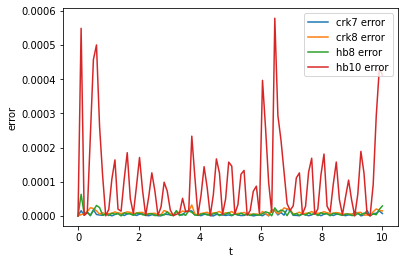

0.0
0.000613236488863543
2.430154372468074e-05
7.149829080760339e-06
9.206405720829647e-06
4.828537650936049e-06
9.184171216258807e-06
9.816577256127612e-06
1.1982191059856095e-05
1.3452762035515153e-05
1.5162872220697565e-05
1.6710789532581316e-05
1.825962716239804e-05
1.9734017946415605e-05
3.379588013663337e-06
4.4454593972620415e-06
4.625847087158519e-06
4.840917345316775e-06
5.0439376954036774e-06
5.236824016430219e-06
5.41906744422338e-06
5.59030362590196e-06
5.750184430275418e-06
5.898385201708045e-06
6.03460484660534e-06
6.1585666788488425e-06
6.2700189159548e-06
6.36873515391656e-06
6.45451485437043e-06
6.527183794902136e-06
6.586594422763881e-06
6.632625963010064e-06
6.6651849611742975e-06
6.684205282270206e-06
6.689648300972628e-06
6.681502946248585e-06
6.659785752538561e-06
6.624540866195794e-06
6.5758398669624185e-06
6.5137816359639444e-06
6.438492278881824e-06
6.350124718057515e-06
6.248858430812909e-06
6.134899113385828e-06
6.008478326213762e-06
5.869852740647552e-06
5.7

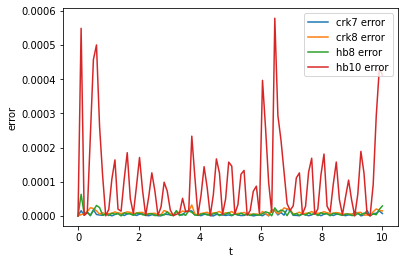

0.0
0.000613236488863543
2.430154372468074e-05
7.149829080760339e-06
9.206405720829647e-06
4.828537650936049e-06
9.184171216258807e-06
9.816577256127612e-06
1.1982191059856095e-05
1.3452762035515153e-05
1.5162872220697565e-05
1.6710789532581316e-05
1.825962716239804e-05
1.9734017946415605e-05
3.379588013663337e-06
4.4454593972620415e-06
4.625847087158519e-06
4.840917345316775e-06
5.0439376954036774e-06
5.236824016430219e-06
5.41906744422338e-06
5.59030362590196e-06
5.750184430275418e-06
5.898385201708045e-06
6.03460484660534e-06
6.1585666788488425e-06
6.2700189159548e-06
6.36873515391656e-06
6.45451485437043e-06
6.527183794902136e-06
6.586594422763881e-06
6.632625963010064e-06
6.6651849611742975e-06
6.684205282270206e-06
6.689648300972628e-06
6.681502946248585e-06
6.659785752538561e-06
6.624540866195794e-06
6.5758398669624185e-06
6.5137816359639444e-06
6.438492278881824e-06
6.350124718057515e-06
6.248858430812909e-06
6.134899113385828e-06
6.008478326213762e-06
5.869852740647552e-06
5.7

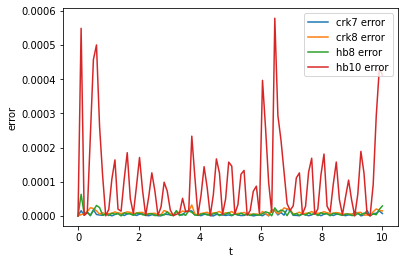

0.0
0.000613236488863543
2.430154372468074e-05
7.149829080760339e-06
9.206405720829647e-06
4.828537650936049e-06
9.184171216258807e-06
9.816577256127612e-06
1.1982191059856095e-05
1.3452762035515153e-05
1.5162872220697565e-05
1.6710789532581316e-05
1.825962716239804e-05
1.9734017946415605e-05
3.379588013663337e-06
4.4454593972620415e-06
4.625847087158519e-06
4.840917345316775e-06
5.0439376954036774e-06
5.236824016430219e-06
5.41906744422338e-06
5.59030362590196e-06
5.750184430275418e-06
5.898385201708045e-06
6.03460484660534e-06
6.1585666788488425e-06
6.2700189159548e-06
6.36873515391656e-06
6.45451485437043e-06
6.527183794902136e-06
6.586594422763881e-06
6.632625963010064e-06
6.6651849611742975e-06
6.684205282270206e-06
6.689648300972628e-06
6.681502946248585e-06
6.659785752538561e-06
6.624540866195794e-06
6.5758398669624185e-06
6.5137816359639444e-06
6.438492278881824e-06
6.350124718057515e-06
6.248858430812909e-06
6.134899113385828e-06
6.008478326213762e-06
5.869852740647552e-06
5.7

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 135
nsuccessful_steps = 77
integration complete


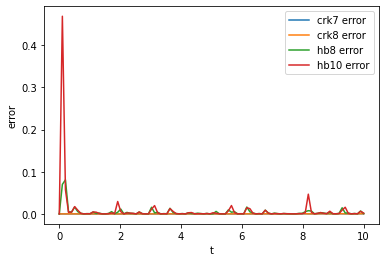

0.0
7.055754520779445e-05
0.0001248502344677327
3.873644774632368e-05
2.4315453067469406e-05
2.1158152894606985e-05
3.0880397172028395e-05
5.4215007981639474e-05
3.34913885560173e-05
2.1492560072555733e-05
1.706151184377447e-05
1.8773251201142926e-05
4.5363533529352296e-05
2.4167644712358438e-05
1.4762302472437483e-05
1.3871764037443057e-05
1.1434459378234507e-05
7.480738407439347e-05
4.3473187860243456e-05
3.416356731644754e-05
4.38690050881263e-05
7.989258064178273e-05
8.90207590606984e-05
5.528838795854085e-05
4.722758344266609e-05
6.726210785545916e-05
0.00011831515851468133
0.00013152687814321773
8.2607275405433e-05
7.14841009288314e-05
0.00010354599924555785
0.00018186548374332645
0.00014973517946126336
9.036082592706052e-05
7.479543435851e-05
0.00010233135980586283
0.00018032488124997137
0.00015549112843049606
9.48934992579531e-05
7.958735493263092e-05
0.00011071369117021668
0.00019536385987550808
0.0001732900878048671
0.00010697816559490647
9.090308103720801e-05
0.0001285915951

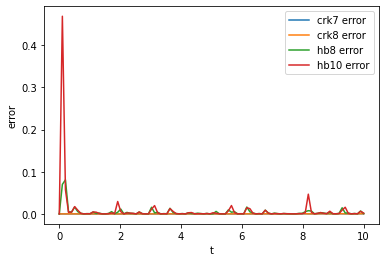

0.0
7.055754520779445e-05
0.0001248502344677327
3.873644774632368e-05
2.4315453067469406e-05
2.1158152894606985e-05
3.0880397172028395e-05
5.4215007981639474e-05
3.34913885560173e-05
2.1492560072555733e-05
1.706151184377447e-05
1.8773251201142926e-05
4.5363533529352296e-05
2.4167644712358438e-05
1.4762302472437483e-05
1.3871764037443057e-05
1.1434459378234507e-05
7.480738407439347e-05
4.3473187860243456e-05
3.416356731644754e-05
4.38690050881263e-05
7.989258064178273e-05
8.90207590606984e-05
5.528838795854085e-05
4.722758344266609e-05
6.726210785545916e-05
0.00011831515851468133
0.00013152687814321773
8.2607275405433e-05
7.14841009288314e-05
0.00010354599924555785
0.00018186548374332645
0.00014973517946126336
9.036082592706052e-05
7.479543435851e-05
0.00010233135980586283
0.00018032488124997137
0.00015549112843049606
9.48934992579531e-05
7.958735493263092e-05
0.00011071369117021668
0.00019536385987550808
0.0001732900878048671
0.00010697816559490647
9.090308103720801e-05
0.0001285915951

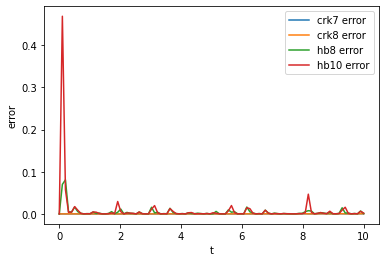

0.0
7.055754520779445e-05
0.0001248502344677327
3.873644774632368e-05
2.4315453067469406e-05
2.1158152894606985e-05
3.0880397172028395e-05
5.4215007981639474e-05
3.34913885560173e-05
2.1492560072555733e-05
1.706151184377447e-05
1.8773251201142926e-05
4.5363533529352296e-05
2.4167644712358438e-05
1.4762302472437483e-05
1.3871764037443057e-05
1.1434459378234507e-05
7.480738407439347e-05
4.3473187860243456e-05
3.416356731644754e-05
4.38690050881263e-05
7.989258064178273e-05
8.90207590606984e-05
5.528838795854085e-05
4.722758344266609e-05
6.726210785545916e-05
0.00011831515851468133
0.00013152687814321773
8.2607275405433e-05
7.14841009288314e-05
0.00010354599924555785
0.00018186548374332645
0.00014973517946126336
9.036082592706052e-05
7.479543435851e-05
0.00010233135980586283
0.00018032488124997137
0.00015549112843049606
9.48934992579531e-05
7.958735493263092e-05
0.00011071369117021668
0.00019536385987550808
0.0001732900878048671
0.00010697816559490647
9.090308103720801e-05
0.0001285915951

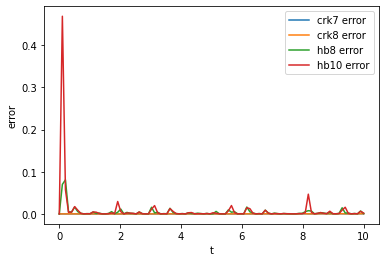

0.0
7.055754520779445e-05
0.0001248502344677327
3.873644774632368e-05
2.4315453067469406e-05
2.1158152894606985e-05
3.0880397172028395e-05
5.4215007981639474e-05
3.34913885560173e-05
2.1492560072555733e-05
1.706151184377447e-05
1.8773251201142926e-05
4.5363533529352296e-05
2.4167644712358438e-05
1.4762302472437483e-05
1.3871764037443057e-05
1.1434459378234507e-05
7.480738407439347e-05
4.3473187860243456e-05
3.416356731644754e-05
4.38690050881263e-05
7.989258064178273e-05
8.90207590606984e-05
5.528838795854085e-05
4.722758344266609e-05
6.726210785545916e-05
0.00011831515851468133
0.00013152687814321773
8.2607275405433e-05
7.14841009288314e-05
0.00010354599924555785
0.00018186548374332645
0.00014973517946126336
9.036082592706052e-05
7.479543435851e-05
0.00010233135980586283
0.00018032488124997137
0.00015549112843049606
9.48934992579531e-05
7.958735493263092e-05
0.00011071369117021668
0.00019536385987550808
0.0001732900878048671
0.00010697816559490647
9.090308103720801e-05
0.0001285915951

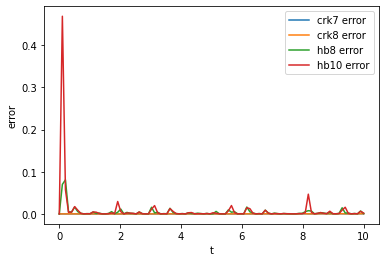

0.0
7.055754520779445e-05
0.0001248502344677327
3.873644774632368e-05
2.4315453067469406e-05
2.1158152894606985e-05
3.0880397172028395e-05
5.4215007981639474e-05
3.34913885560173e-05
2.1492560072555733e-05
1.706151184377447e-05
1.8773251201142926e-05
4.5363533529352296e-05
2.4167644712358438e-05
1.4762302472437483e-05
1.3871764037443057e-05
1.1434459378234507e-05
7.480738407439347e-05
4.3473187860243456e-05
3.416356731644754e-05
4.38690050881263e-05
7.989258064178273e-05
8.90207590606984e-05
5.528838795854085e-05
4.722758344266609e-05
6.726210785545916e-05
0.00011831515851468133
0.00013152687814321773
8.2607275405433e-05
7.14841009288314e-05
0.00010354599924555785
0.00018186548374332645
0.00014973517946126336
9.036082592706052e-05
7.479543435851e-05
0.00010233135980586283
0.00018032488124997137
0.00015549112843049606
9.48934992579531e-05
7.958735493263092e-05
0.00011071369117021668
0.00019536385987550808
0.0001732900878048671
0.00010697816559490647
9.090308103720801e-05
0.0001285915951

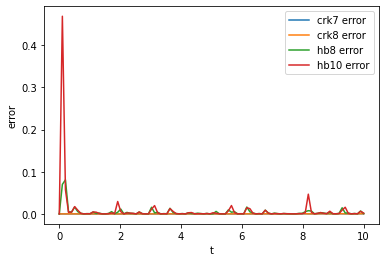

0.0
7.055754520779445e-05
0.0001248502344677327
3.873644774632368e-05
2.4315453067469406e-05
2.1158152894606985e-05
3.0880397172028395e-05
5.4215007981639474e-05
3.34913885560173e-05
2.1492560072555733e-05
1.706151184377447e-05
1.8773251201142926e-05
4.5363533529352296e-05
2.4167644712358438e-05
1.4762302472437483e-05
1.3871764037443057e-05
1.1434459378234507e-05
7.480738407439347e-05
4.3473187860243456e-05
3.416356731644754e-05
4.38690050881263e-05
7.989258064178273e-05
8.90207590606984e-05
5.528838795854085e-05
4.722758344266609e-05
6.726210785545916e-05
0.00011831515851468133
0.00013152687814321773
8.2607275405433e-05
7.14841009288314e-05
0.00010354599924555785
0.00018186548374332645
0.00014973517946126336
9.036082592706052e-05
7.479543435851e-05
0.00010233135980586283
0.00018032488124997137
0.00015549112843049606
9.48934992579531e-05
7.958735493263092e-05
0.00011071369117021668
0.00019536385987550808
0.0001732900878048671
0.00010697816559490647
9.090308103720801e-05
0.0001285915951

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 7
nsuccessful_steps = 7
integration complete


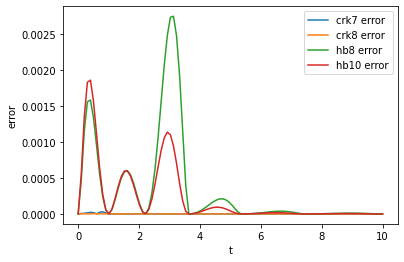

0.0
1.2734258092450546e-13
1.1524114995609125e-13
7.926992395823618e-14
6.125655538369301e-14
4.5005665860742283e-14
3.499978085130806e-14
2.6895152771544417e-14
nsteps = 7
nsuccessful_steps = 7
integration complete


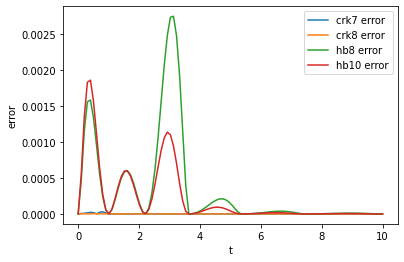

0.0
1.2734258092450546e-13
1.1524114995609125e-13
7.926992395823618e-14
6.125655538369301e-14
4.5005665860742283e-14
3.499978085130806e-14
2.6895152771544417e-14
nsteps = 7
nsuccessful_steps = 7
integration complete


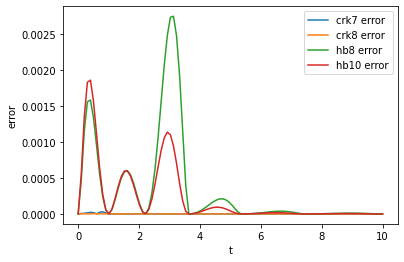

0.0
1.2734258092450546e-13
1.1524114995609125e-13
7.926992395823618e-14
6.125655538369301e-14
4.5005665860742283e-14
3.499978085130806e-14
2.6895152771544417e-14
nsteps = 7
nsuccessful_steps = 7
integration complete


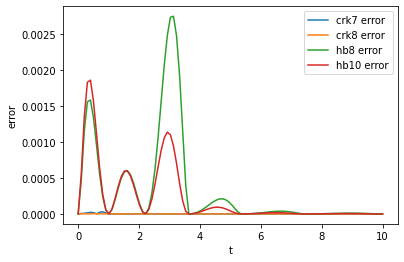

0.0
1.2734258092450546e-13
1.1524114995609125e-13
7.926992395823618e-14
6.125655538369301e-14
4.5005665860742283e-14
3.499978085130806e-14
2.6895152771544417e-14
nsteps = 7
nsuccessful_steps = 7
integration complete


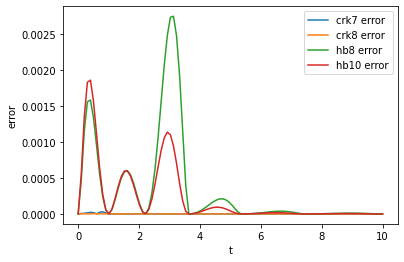

0.0
1.2734258092450546e-13
1.1524114995609125e-13
7.926992395823618e-14
6.125655538369301e-14
4.5005665860742283e-14
3.499978085130806e-14
2.6895152771544417e-14
nsteps = 7
nsuccessful_steps = 7
integration complete


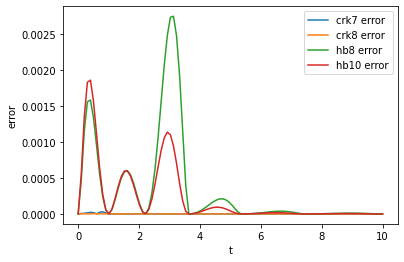

0.0
1.2734258092450546e-13
1.1524114995609125e-13
7.926992395823618e-14
6.125655538369301e-14
4.5005665860742283e-14
3.499978085130806e-14
2.6895152771544417e-14


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 7
nsuccessful_steps = 7
integration complete


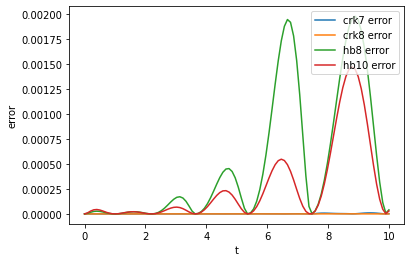

0.0
3.863509512314067e-11
6.178901834630324e-11
1.0553172780092268e-09
2.583599778560597e-09
2.807647295210991e-08
8.446232391268182e-08
2.2583933872999395e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


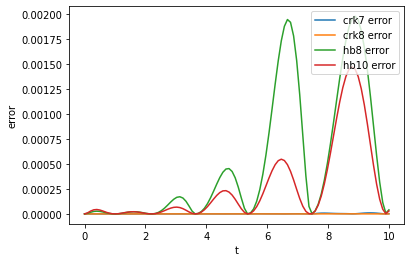

0.0
3.863509512314067e-11
6.178901834630324e-11
1.0553172780092268e-09
2.583599778560597e-09
2.807647295210991e-08
8.446232391268182e-08
2.2583933872999395e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


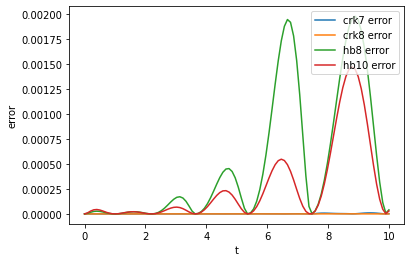

0.0
3.863509512314067e-11
6.178901834630324e-11
1.0553172780092268e-09
2.583599778560597e-09
2.807647295210991e-08
8.446232391268182e-08
2.2583933872999395e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


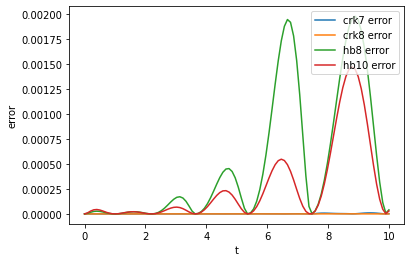

0.0
3.863509512314067e-11
6.178901834630324e-11
1.0553172780092268e-09
2.583599778560597e-09
2.807647295210991e-08
8.446232391268182e-08
2.2583933872999395e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


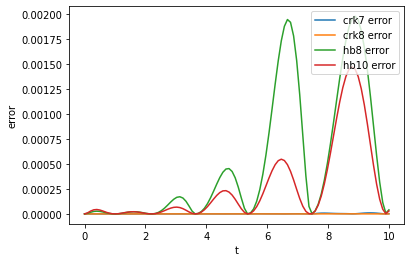

0.0
3.863509512314067e-11
6.178901834630324e-11
1.0553172780092268e-09
2.583599778560597e-09
2.807647295210991e-08
8.446232391268182e-08
2.2583933872999395e-07
nsteps = 7
nsuccessful_steps = 7
integration complete


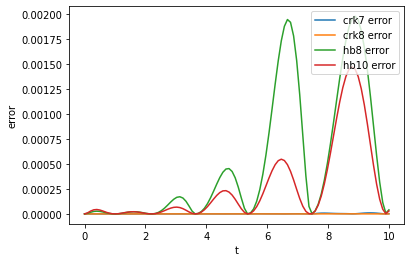

0.0
3.863509512314067e-11
6.178901834630324e-11
1.0553172780092268e-09
2.583599778560597e-09
2.807647295210991e-08
8.446232391268182e-08
2.2583933872999395e-07


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 11
nsuccessful_steps = 9
integration complete


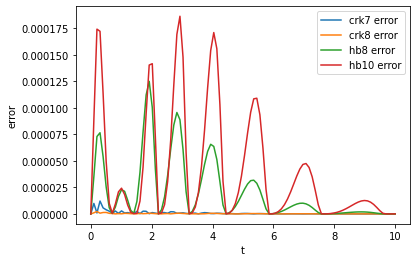

0.0
3.7750195752694893e-07
1.8826189496223833e-07
1.7973988386543738e-07
1.9719904553738843e-07
1.713190962426836e-07
1.0352479451469776e-07
3.9333162948906875e-08
7.67342100971291e-09
4.114619756023785e-10
nsteps = 11
nsuccessful_steps = 9
integration complete


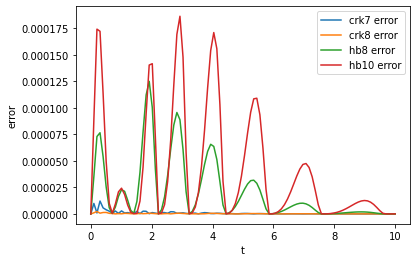

0.0
3.7750195752694893e-07
1.8826189496223833e-07
1.7973988386543738e-07
1.9719904553738843e-07
1.713190962426836e-07
1.0352479451469776e-07
3.9333162948906875e-08
7.67342100971291e-09
4.114619756023785e-10
nsteps = 11
nsuccessful_steps = 9
integration complete


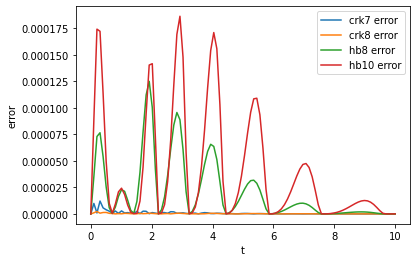

0.0
3.7750195752694893e-07
1.8826189496223833e-07
1.7973988386543738e-07
1.9719904553738843e-07
1.713190962426836e-07
1.0352479451469776e-07
3.9333162948906875e-08
7.67342100971291e-09
4.114619756023785e-10
nsteps = 11
nsuccessful_steps = 9
integration complete


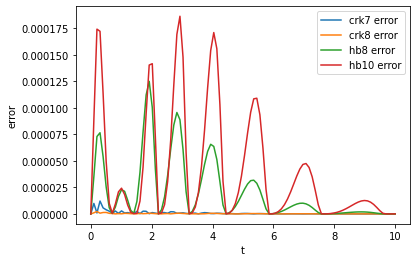

0.0
3.7750195752694893e-07
1.8826189496223833e-07
1.7973988386543738e-07
1.9719904553738843e-07
1.713190962426836e-07
1.0352479451469776e-07
3.9333162948906875e-08
7.67342100971291e-09
4.114619756023785e-10
nsteps = 11
nsuccessful_steps = 9
integration complete


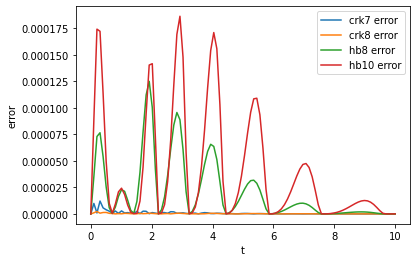

0.0
3.7750195752694893e-07
1.8826189496223833e-07
1.7973988386543738e-07
1.9719904553738843e-07
1.713190962426836e-07
1.0352479451469776e-07
3.9333162948906875e-08
7.67342100971291e-09
4.114619756023785e-10
nsteps = 11
nsuccessful_steps = 9
integration complete


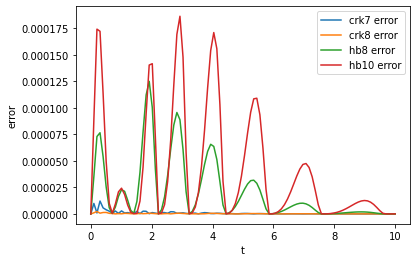

0.0
3.7750195752694893e-07
1.8826189496223833e-07
1.7973988386543738e-07
1.9719904553738843e-07
1.713190962426836e-07
1.0352479451469776e-07
3.9333162948906875e-08
7.67342100971291e-09
4.114619756023785e-10


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)